# Monty Hall

“Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say #1, and the host, who knows what’s behind the doors, opens another door, say #3, which has a goat. He says to you, ‘Do you want to pick door #2?’ Is it to your advantage to switch your choice of doors?”

Pearl, Judea. The Book of Why: The New Science of Cause and Effect (p. 190). Basic Books. Kindle Edition.

Construct a Bayesian Network for Monty Hall problem. Visualize it. Query it about which door you should open. What is the probability of success?

1. Visualizing network structure

In [1]:
!pip3 install -q daft
!pip3 install -q pgmpy
import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


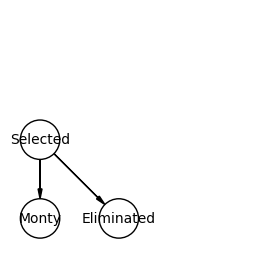

In [2]:
import daft
from daft import PGM

pgm = PGM(shape=[3, 3])

pgm.add_node(daft.Node('Selected', r"Selected", 1,2))
pgm.add_node(daft.Node('Eliminated', r"Eliminated", 2,1))
pgm.add_node(daft.Node('Monty', r"Monty", 1,1))
pgm.add_edge('Selected', 'Monty')
pgm.add_edge('Selected', 'Eliminated')

pgm.render()
plt.show()


2. Convert structure to Bayesian Network

In [3]:
from pgmpy.models.BayesianModel import BayesianNetwork

def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianNetwork(edges)
    return model

net = convert_pgm_to_pgmpy(pgm)

from pgmpy.factors.discrete import TabularCPD
cpd_selected = TabularCPD(variable='Selected', variable_card=2, 
values=[[0.33], [0.67]], state_names={'Selected': ['Car', 'Goat']})
cpd_eliminated = TabularCPD(variable='Eliminated', variable_card=2, 
values=[[0, 0], [1, 1]], state_names={'Eliminated': ['Car', 'Goat'], 
                                        'Selected': ['Car', 'Goat']},  evidence=['Selected'], evidence_card=[2])
cpd_monty = TabularCPD(variable='Monty', variable_card=2, 
values=[[0, 1], [1, 0]], state_names={'Monty': ['Car', 'Goat'], 
                                        'Selected': ['Car', 'Goat']},  evidence=['Selected'], evidence_card=[2])
net.add_cpds(cpd_selected, cpd_eliminated, cpd_monty)


INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


3. Write queries

In [4]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(net)

selected_dist = infer.query(['Selected'])
print(selected_dist)

monty_dist = infer.query(['Eliminated'])
print(monty_dist)

monty_dist = infer.query(['Monty'])
print(monty_dist)

+----------------+-----------------+
| Selected       |   phi(Selected) |
+================+=================+
| Selected(Car)  |          0.3300 |
+----------------+-----------------+
| Selected(Goat) |          0.6700 |
+----------------+-----------------+
+------------------+-------------------+
| Eliminated       |   phi(Eliminated) |
+==================+===================+
| Eliminated(Car)  |            0.0000 |
+------------------+-------------------+
| Eliminated(Goat) |            1.0000 |
+------------------+-------------------+
+-------------+--------------+
| Monty       |   phi(Monty) |
+=============+==============+
| Monty(Car)  |       0.6700 |
+-------------+--------------+
| Monty(Goat) |       0.3300 |
+-------------+--------------+


# Weather data

Construct a Naive Bayes network based on the weather data. What is the prediction accuracy?


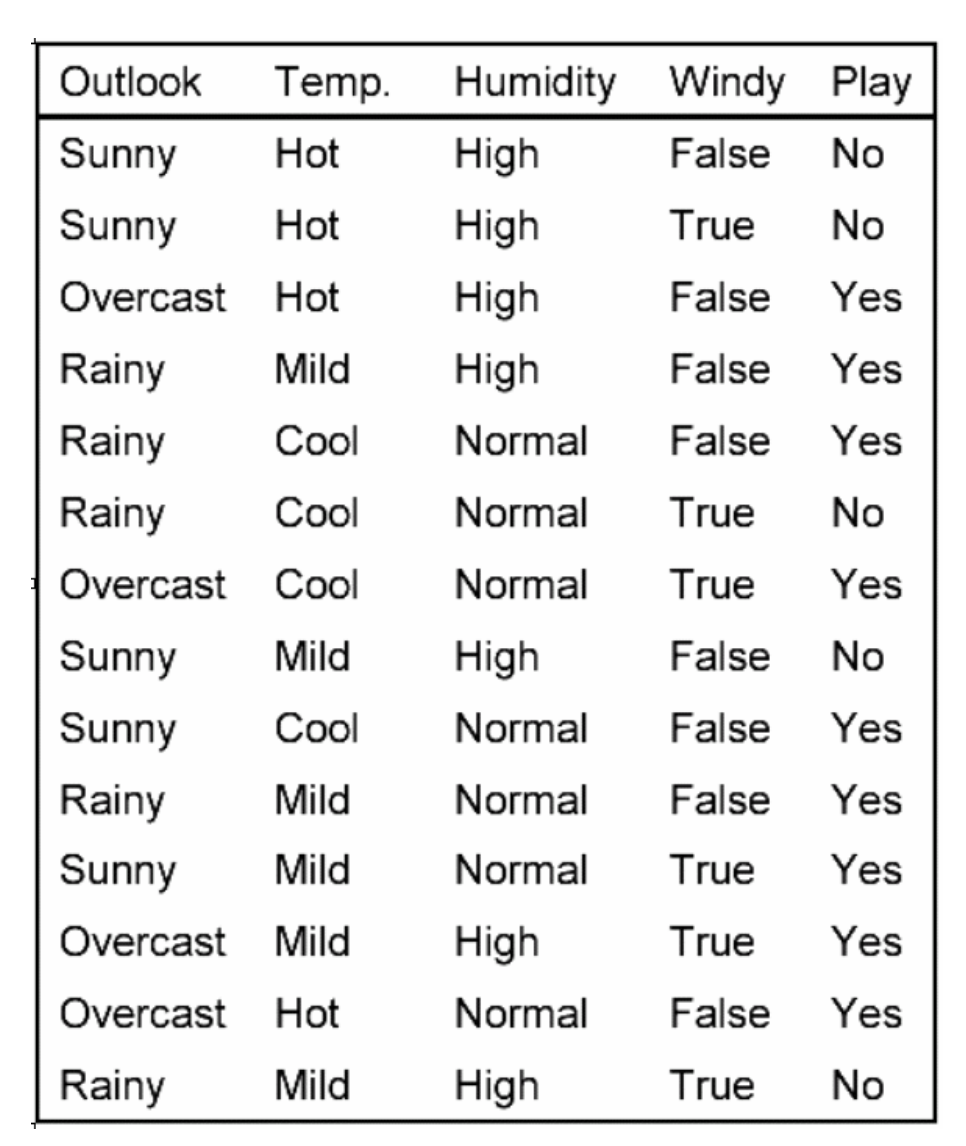

In [5]:
from IPython.display import Image
Image('images/weather_data.png')

Try making Bayesian Network more structured. How does prediction accuracy change?